#Import **libraries**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#load dataset

In [65]:
df= pd.read_csv("bigmart.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [66]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [67]:
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1300,FDR60,14.30,Low Fat,0.130415,Baking Goods,75.9328,OUT046,1997,Small,Tier 1,Supermarket Type1,1158.4920
4832,FDF26,NaN,Regular,0.046409,Canned,153.2998,OUT027,1985,Medium,Tier 3,Supermarket Type3,3998.7948
6629,FDT39,6.26,Regular,0.009888,Meat,150.7366,OUT045,2002,NaN,Tier 2,Supermarket Type1,2418.1856
4915,FDN34,15.60,Regular,0.000000,Snack Foods,170.6132,OUT013,1987,High,Tier 3,Supermarket Type1,6595.4148
1072,DRI51,17.25,Low Fat,0.042234,Dairy,173.3764,OUT035,2004,Small,Tier 2,Supermarket Type1,2061.3168
8317,FDN13,18.60,Low Fat,0.152367,Breakfast,98.5358,OUT045,2002,NaN,Tier 2,Supermarket Type1,1306.9654
4253,FDY20,12.50,Regular,0.081753,Fruits and Vegetables,89.0488,OUT046,1997,Small,Tier 1,Supermarket Type1,1267.6832
4344,FDW19,12.35,Regular,0.038500,Fruits and Vegetables,110.7570,OUT046,1997,Small,Tier 1,Supermarket Type1,1208.4270
6616,FDU59,5.78,Low Fat,0.096306,Breads,161.9552,OUT013,1987,High,Tier 3,Supermarket Type1,2111.9176
7180,FDR27,15.10,Regular,0.096020,Meat,133.7942,OUT013,1987,High,Tier 3,Supermarket Type1,2384.8956


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [69]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [70]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [71]:
df['Outlet_Age'] = 2025 - df['Outlet_Establishment_Year']

In [72]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,16
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,26
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,27
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,38
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,23
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,21
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,16


#remove un needed columns

In [73]:
df=df.drop(['Outlet_Establishment_Year'],axis=1)

In [74]:
df.Item_Weight.value_counts()

,count
Item_Weight,
12.150,86
17.600,82
13.650,77
11.800,76
15.100,68
...,...
8.920,2
6.520,1
9.420,1


#Handle value in the data

In [75]:
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [76]:
def weight_category(x):
    if x < 1:
        return 'Light'
    elif x <= 5:
        return 'Medium'
    else:
        return 'Heavy'

df['Weight_Category'] = df['Item_Weight'].apply(weight_category)
#I converted the Item_Weight column into categories (Light, Medium, Heavy) to simplify the visualization and make it easier to analyze the sales distribution across different weight ranges.


In [77]:
df["Outlet_Size"]=df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [78]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
 11  Outlet_Age            8523 non-null   int64  
 12  Weight_Category       8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 865.7+ KB


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857890,4.232804,4.555,9.310000,12.867061,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800
Outlet_Age,8523.0,27.168133,8.371760,16.000,21.000000,26.000000,38.000000,40.000000


In [115]:
df.Item_Visibility.min()

0.0

In [81]:
#After seeing the min in the info
visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

def fix_visibility(row):
    if row['Item_Visibility'] == 0:
        return visibility_avg.loc[row['Item_Identifier']].values[0]
    else:
        return row['Item_Visibility']

df['Item_Visibility'] = df.apply(fix_visibility, axis=1)

In [82]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [83]:
correct={'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(correct)

In [84]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [85]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [86]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [87]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [88]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Weight_Category
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,38,Heavy
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,23,Heavy
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,21,Heavy
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,16,Heavy
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,Small,Tier 1,Supermarket Type1,765.6700,28,Heavy


#check for duplicated

In [89]:
df.duplicated().sum()

np.int64(0)

# check for outliers

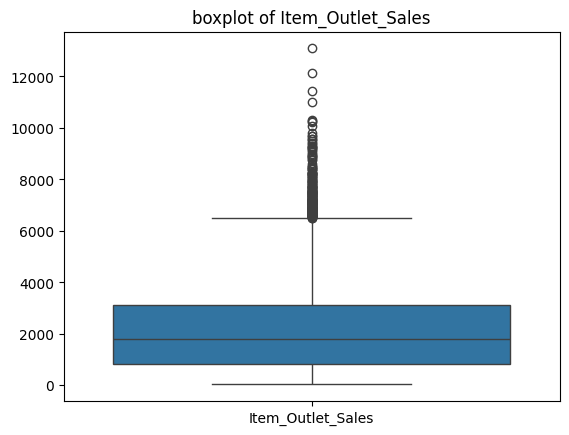

In [90]:
sns.boxplot(data=df[['Item_Outlet_Sales']])
plt.title("boxplot of Item_Outlet_Sales")
plt.show()

In [91]:
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [92]:
df = df[df['Item_Outlet_Sales'].apply(lambda x: lower_bound <= x <= upper_bound)]

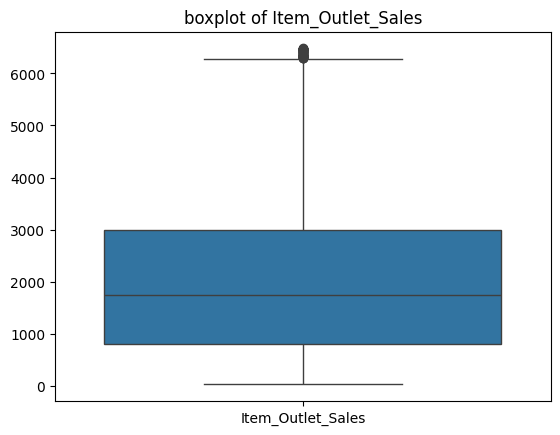

In [93]:
sns.boxplot(data=df[['Item_Outlet_Sales']])
plt.title("boxplot of Item_Outlet_Sales")
plt.show()

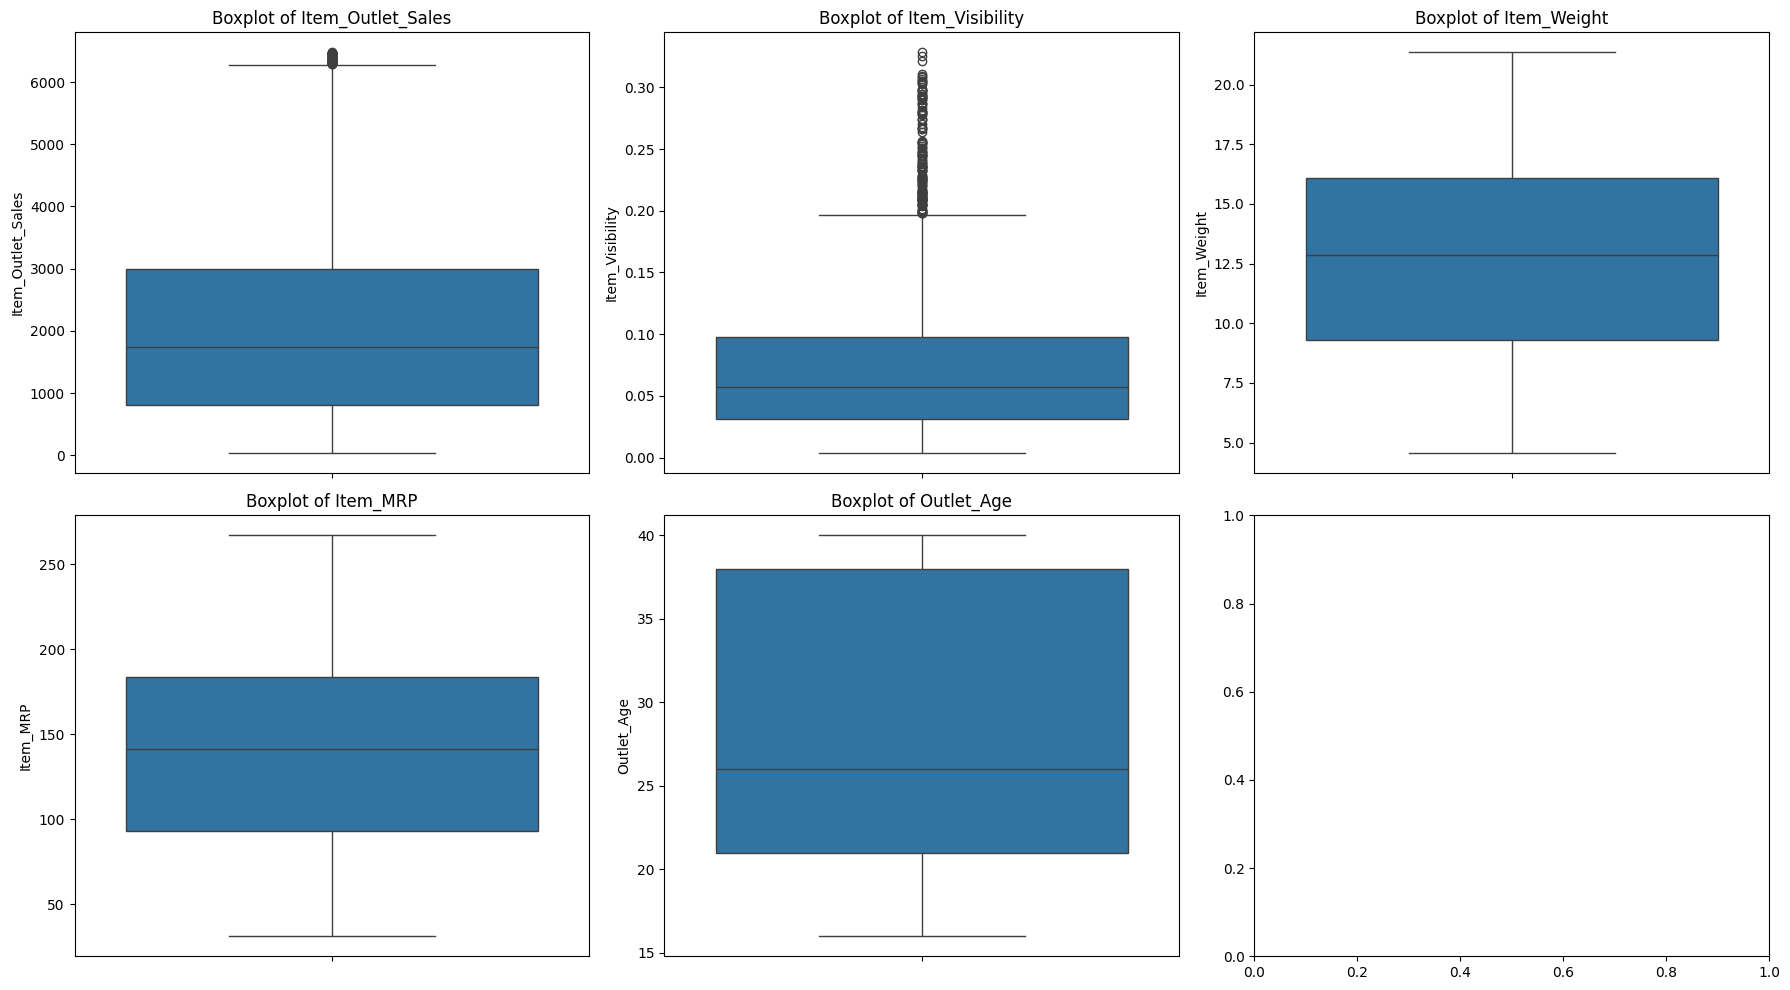

In [94]:
num_cols = ['Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight', 'Item_MRP', 'Outlet_Age']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [95]:
Q1 = df['Item_Visibility'].quantile(0.25)
Q3 = df['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [96]:
df = df[df['Item_Visibility'].apply(lambda x: lower_bound <= x <= upper_bound)]

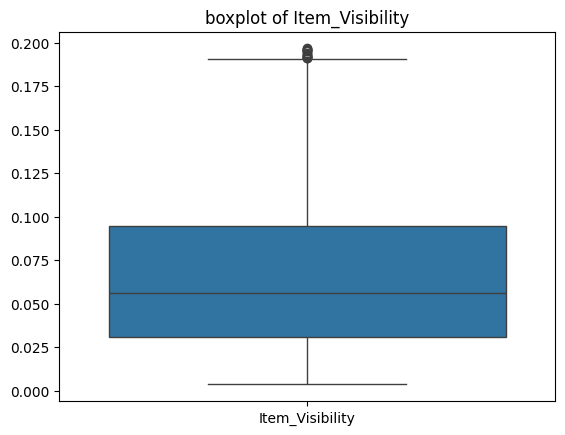

In [97]:
sns.boxplot(data=df[['Item_Visibility']])
plt.title("boxplot of Item_Visibility")
plt.show()

#Visualization

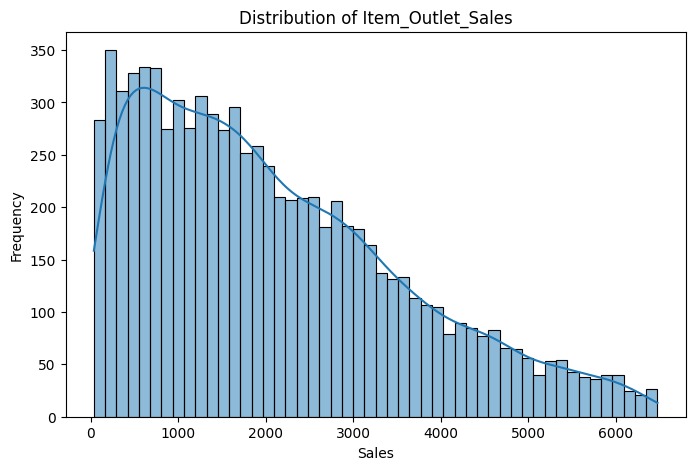

In [98]:
plt.figure(figsize=(8, 5))
sns.histplot(df.Item_Outlet_Sales, bins=50, kde=True)
plt.title("Distribution of Item_Outlet_Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

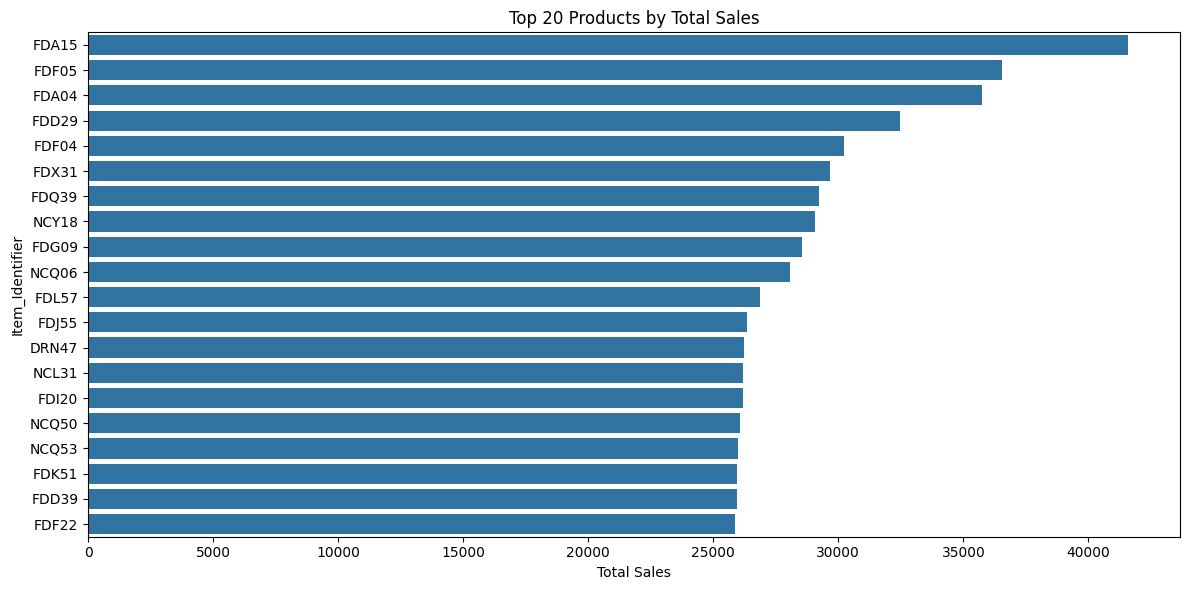

In [99]:
# total sales per product
prod_sales = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

# plot top 20
top_n = 20
plt.figure(figsize=(12,6))
sns.barplot(x=prod_sales.head(top_n).values, y=prod_sales.head(top_n).index)
plt.xlabel('Total Sales')
plt.title(f'Top {top_n} Products by Total Sales')
plt.tight_layout()
plt.show()


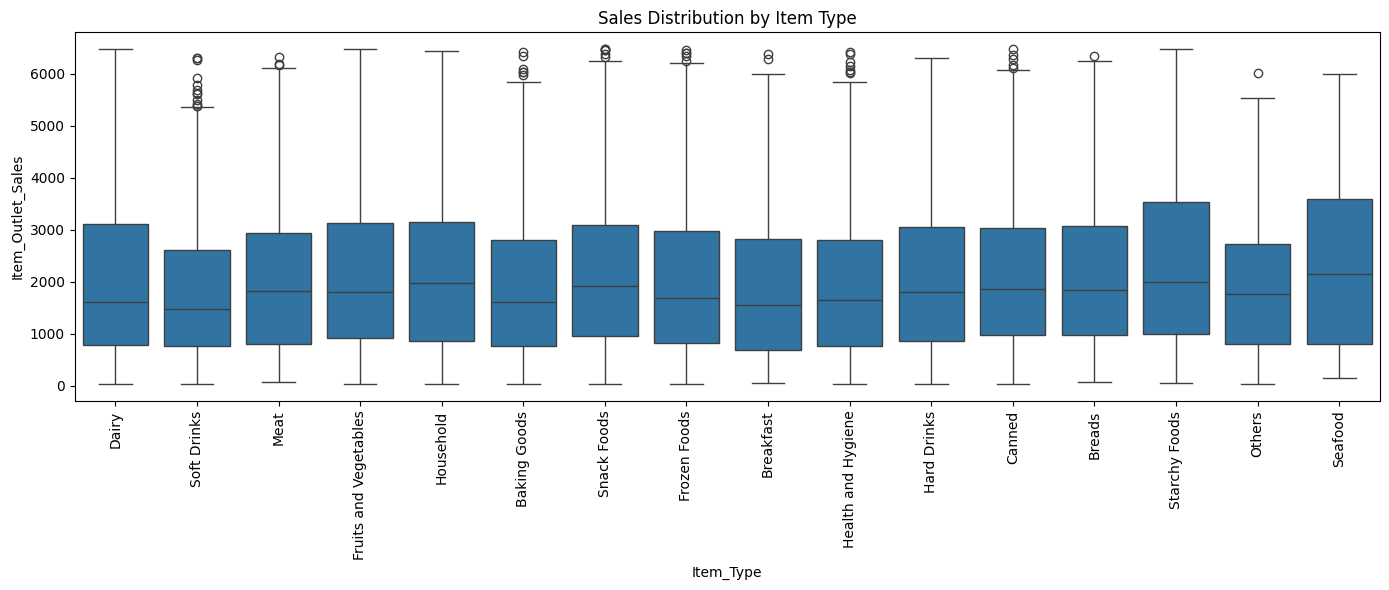

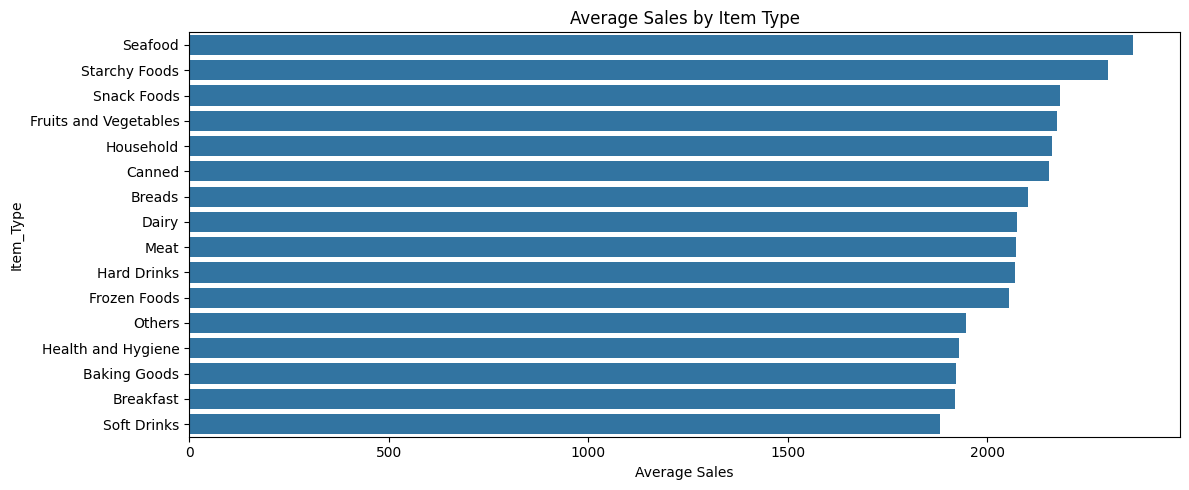

In [100]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.title('Sales Distribution by Item Type')
plt.tight_layout()
plt.show()

# mean sales per type
mean_per_type = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=mean_per_type.values, y=mean_per_type.index)
plt.title('Average Sales by Item Type')
plt.xlabel('Average Sales')
plt.tight_layout()
plt.show()


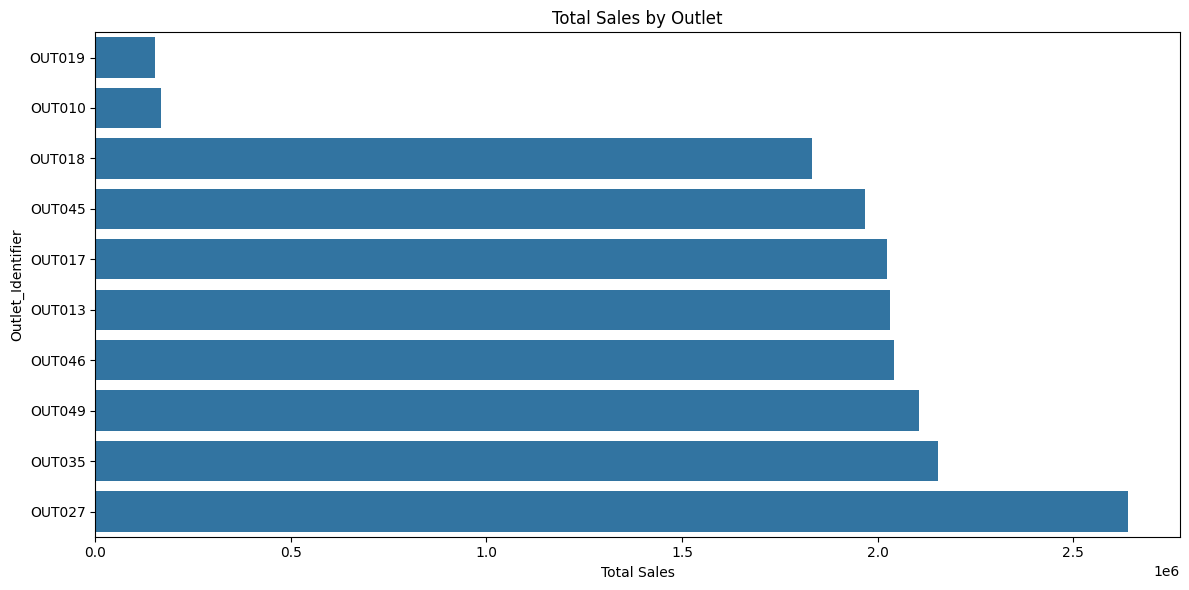

In [101]:
outlet_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values()
plt.figure(figsize=(12,6))
sns.barplot(x=outlet_sales.values, y=outlet_sales.index)
plt.title('Total Sales by Outlet')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()


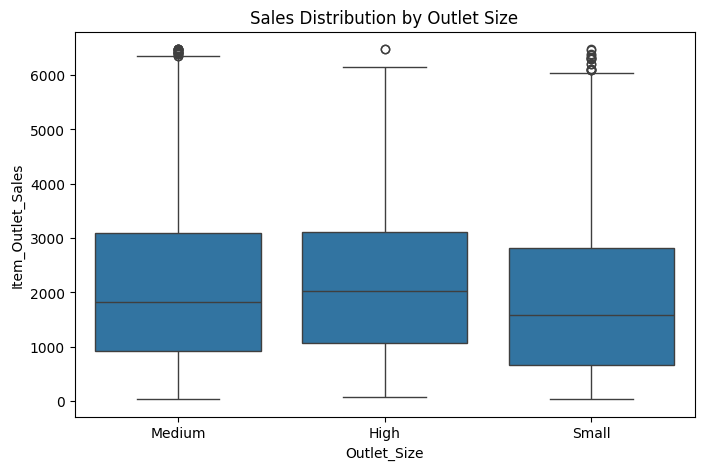

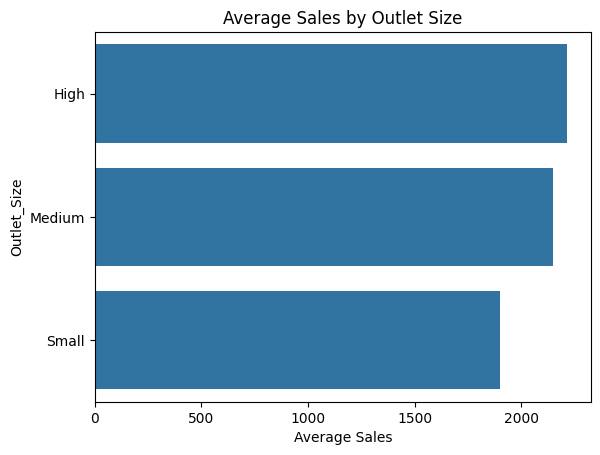

In [102]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales Distribution by Outlet Size')
plt.show()

# mean
means = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
sns.barplot(x=means.values, y=means.index)
plt.title('Average Sales by Outlet Size')
plt.xlabel('Average Sales')
plt.show()


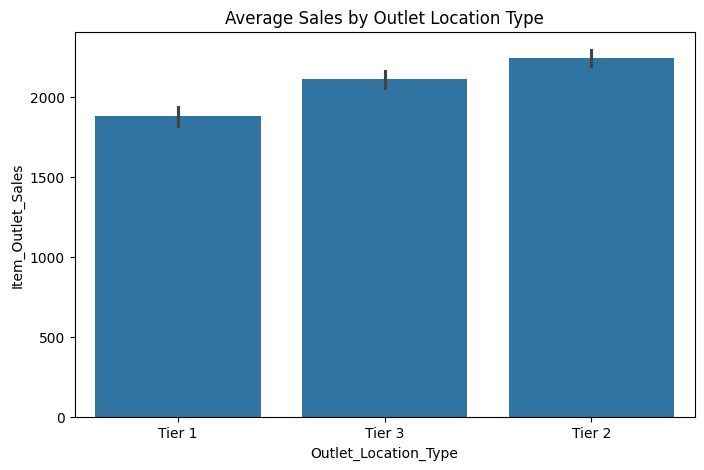

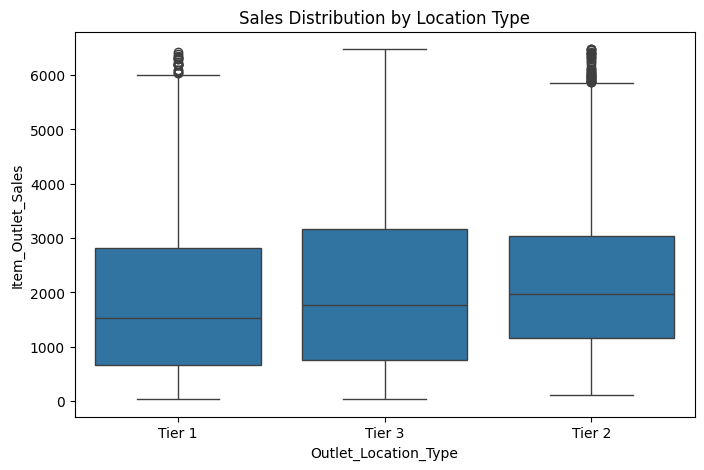

In [103]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, estimator=np.mean)
plt.title('Average Sales by Outlet Location Type')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution by Location Type')
plt.show()


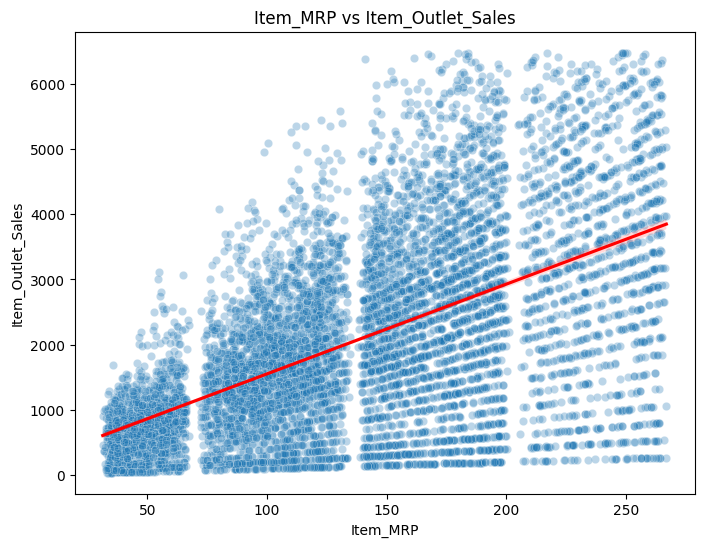

/tmp/ipython-input-2855001257.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mrp_means = df.groupby('MRP_bin')['Item_Outlet_Sales'].mean()


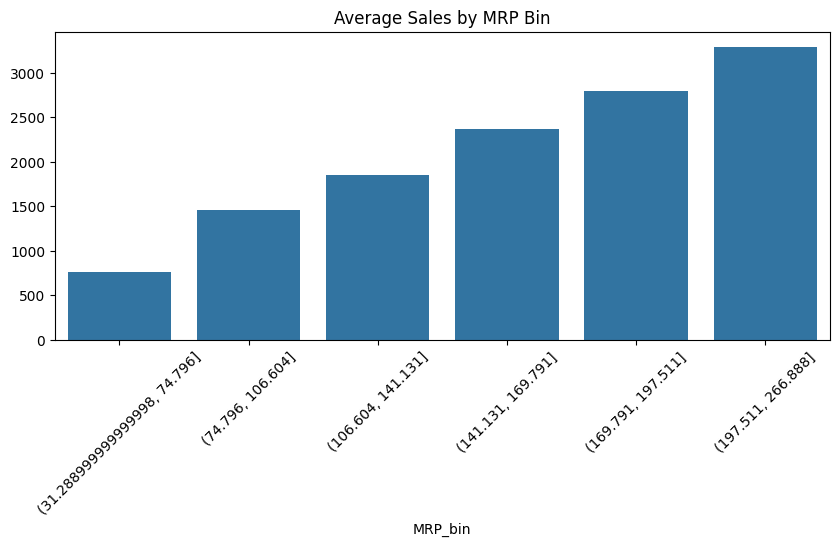

In [104]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, alpha=0.3)
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, scatter=False, color='red')
plt.title('Item_MRP vs Item_Outlet_Sales')
plt.show()

# MRP bins
df['MRP_bin'] = pd.qcut(df['Item_MRP'], 6)
mrp_means = df.groupby('MRP_bin')['Item_Outlet_Sales'].mean()
plt.figure(figsize=(10,4))
sns.barplot(x=mrp_means.index.astype(str), y=mrp_means.values)
plt.xticks(rotation=45)
plt.title('Average Sales by MRP Bin')
plt.show()


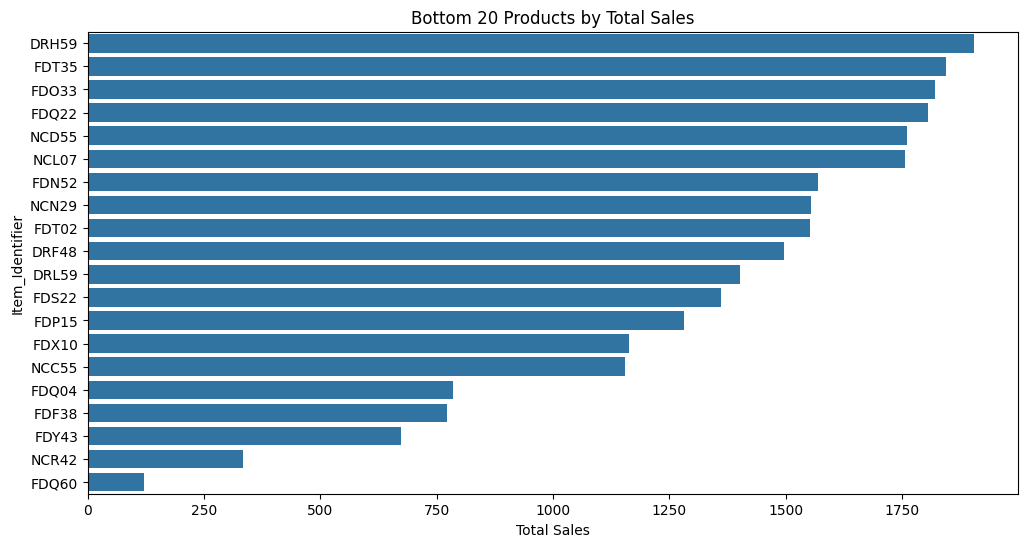

In [105]:
bottom_n = 20
bottom_sales = prod_sales.tail(bottom_n)
plt.figure(figsize=(12,6))
sns.barplot(x=bottom_sales.values, y=bottom_sales.index)
plt.title(f'Bottom {bottom_n} Products by Total Sales')
plt.xlabel('Total Sales')
plt.show()


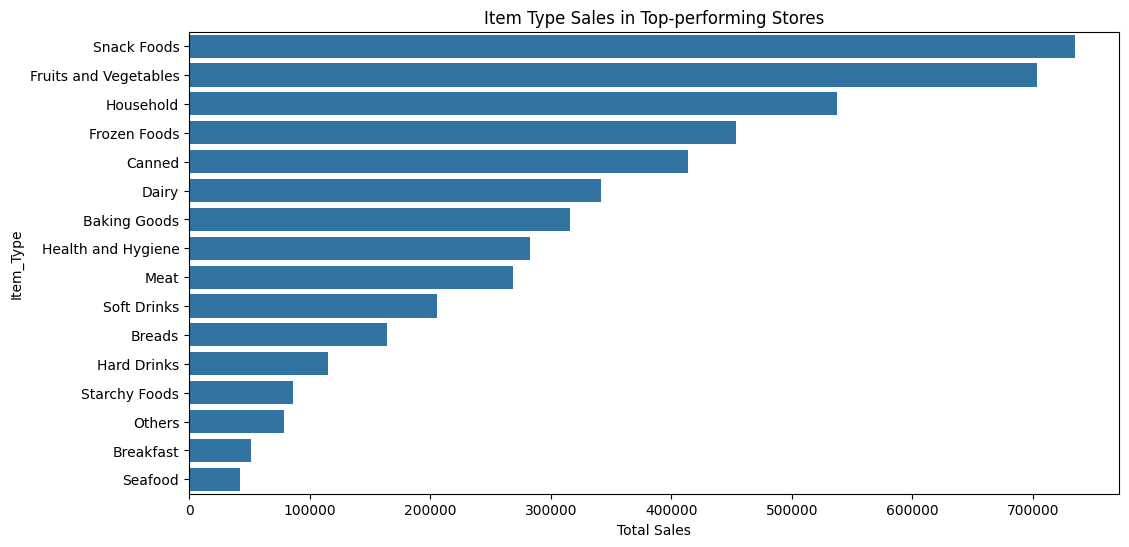

In [106]:
# step1: top stores
store_totals = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
top_threshold = store_totals.quantile(0.8)
top_stores = store_totals[store_totals >= top_threshold].index

# step2: item type sales in top stores
top_data = df[df['Outlet_Identifier'].isin(top_stores)]
type_sales_top = top_data.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=type_sales_top.values, y=type_sales_top.index)
plt.title('Item Type Sales in Top-performing Stores')
plt.xlabel('Total Sales')
plt.show()


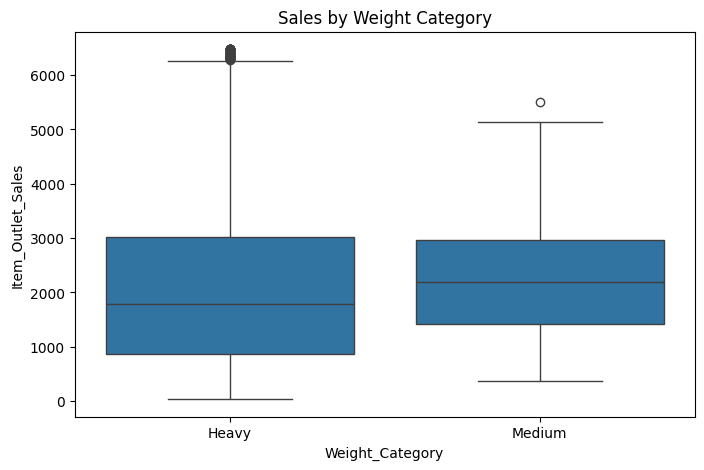

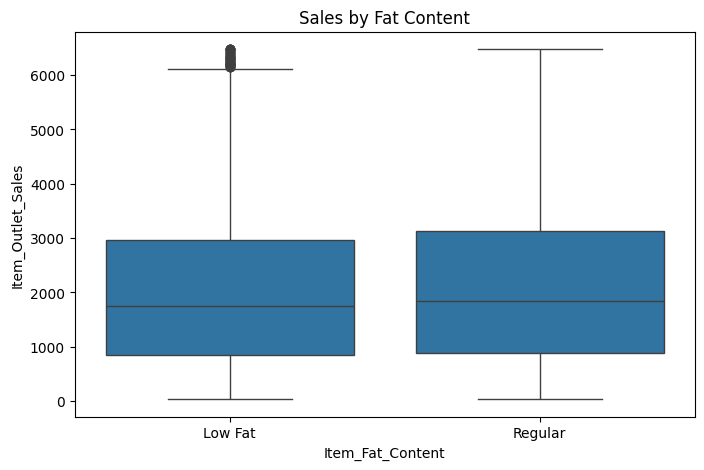

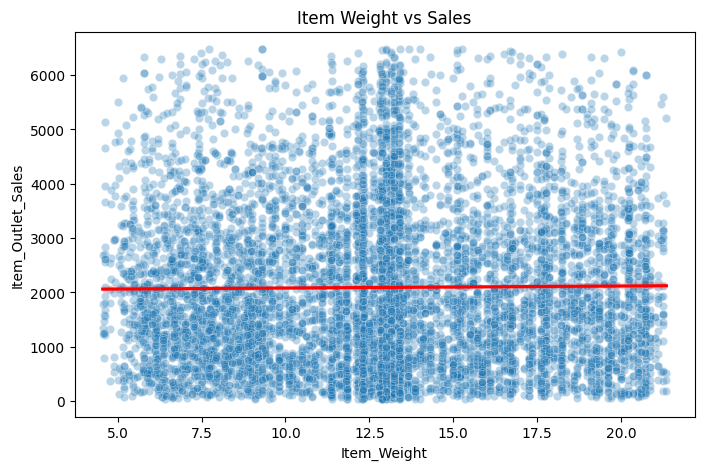

In [107]:
# Weight category boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Weight_Category', y='Item_Outlet_Sales', data=df)
plt.title('Sales by Weight Category')
plt.show()

# Fat content
plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.title('Sales by Fat Content')
plt.show()

# numeric weight vs sales scatter (if weight numeric)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df, alpha=0.3)
sns.regplot(x='Item_Weight', y='Item_Outlet_Sales', data=df, scatter=False, color='red')
plt.title('Item Weight vs Sales')
plt.show()


#Encode Categorical features

In [108]:
df=df.drop(['MRP_bin'],axis=1)

In [109]:
label_encodding = ['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Item_Type', 'Outlet_Size', 'Outlet_Type','Outlet_Location_Type','Weight_Category']

lebel = LabelEncoder()
for Encode in label_encodding:
   df[Encode] = lebel.fit_transform(df[Encode])

In [110]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Weight_Category
5936,1490,17.100000,0,0.036815,9,167.0842,3,1,2,2,1326.2736,16,0
3166,225,8.800000,0,0.071370,13,209.1612,1,0,2,1,2090.6120,38,0
5089,965,13.650000,0,0.015944,1,231.9668,7,1,1,1,3225.1352,23,0
932,1158,20.100000,0,0.074613,4,108.7228,6,2,1,1,1215.7508,21,0
1312,858,12.277108,0,0.130867,0,150.8024,5,1,2,3,4402.2696,40,0


#dependent and independent variable

In [111]:
corr_matrix = df.corr()
print(corr_matrix)

                      Item_Identifier  Item_Weight  Item_Fat_Content  \
Item_Identifier              1.000000     0.052450         -0.116807   
Item_Weight                  0.052450     1.000000         -0.023151   
Item_Fat_Content            -0.116807    -0.023151          1.000000   
Item_Visibility             -0.027516    -0.013532          0.054639   
Item_Type                   -0.014870     0.035245         -0.138760   
Item_MRP                     0.012202     0.026937          0.009980   
Outlet_Identifier           -0.010656    -0.011550          0.004611   
Outlet_Size                  0.001933    -0.007354         -0.002647   
Outlet_Location_Type         0.002136     0.005206         -0.002398   
Outlet_Type                 -0.005183    -0.005379          0.006385   
Item_Outlet_Sales           -0.000356     0.010556          0.026947   
Outlet_Age                   0.015092     0.009268         -0.002634   
Weight_Category             -0.015836    -0.144497         -0.00

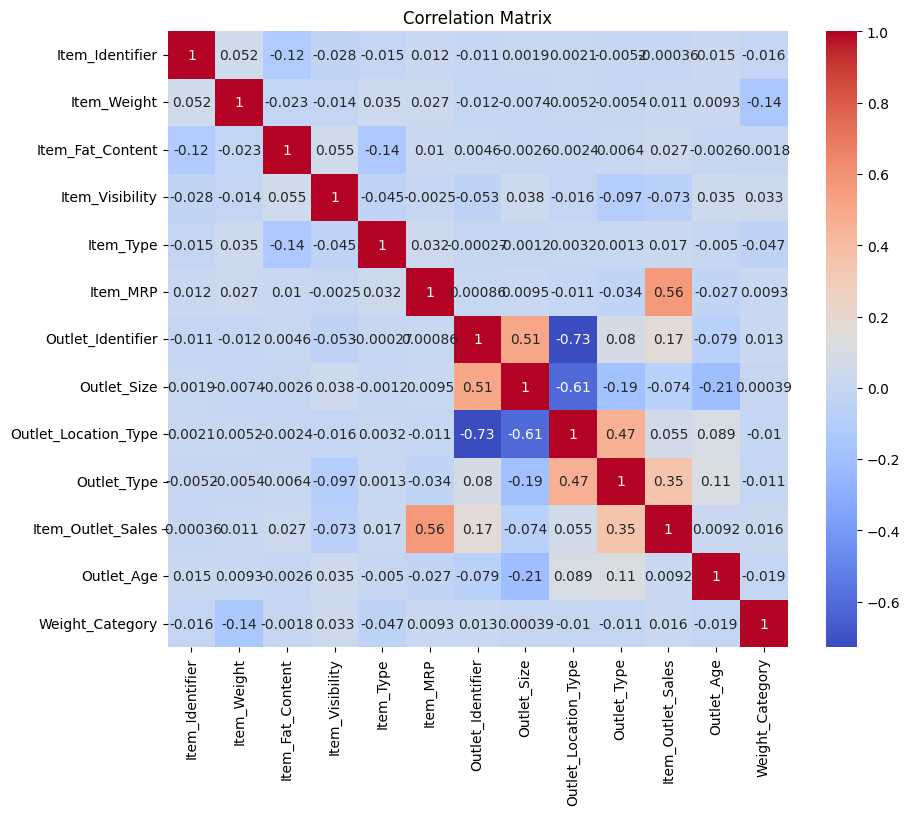

In [112]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [113]:
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

,Item_Outlet_Sales
Item_Outlet_Sales,1.000000
Item_MRP,0.564140
Outlet_Type,0.353830
Outlet_Identifier,0.167003
Outlet_Location_Type,0.055497
Item_Fat_Content,0.026947
Item_Type,0.017394
Weight_Category,0.016212
Item_Weight,0.010556
Outlet_Age,0.009214


# Scaling to Numirical

In [114]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

cols_to_scale = [col for col in numerical_cols if col not in ['Item_Outlet_Sales', 'Outlet_Establishment_Year']]


scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Normalization (Min-Max Scaling) complete for the following columns:")
print(cols_to_scale)
print("\nFirst 5 rows of the normalized data:")
print(df[cols_to_scale].head())

Normalization (Min-Max Scaling) complete for the following columns:
['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Age', 'Weight_Category']

First 5 rows of the normalized data:
   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0         0.100128     0.282525               0.0         0.064596   0.266667   
1         0.005135     0.081274               1.0         0.081329   0.933333   
2         0.424904     0.770765               0.0         0.068288   0.666667   
3         0.719512     0.871986               1.0         0.060590   0.400000   
4         0.832478     0.260494               0.0         0.023344   0.600000   

   Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
0  0.927507           1.000000          0.5                   0.0   
1  0.072068           0.333333          0.5                   